# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

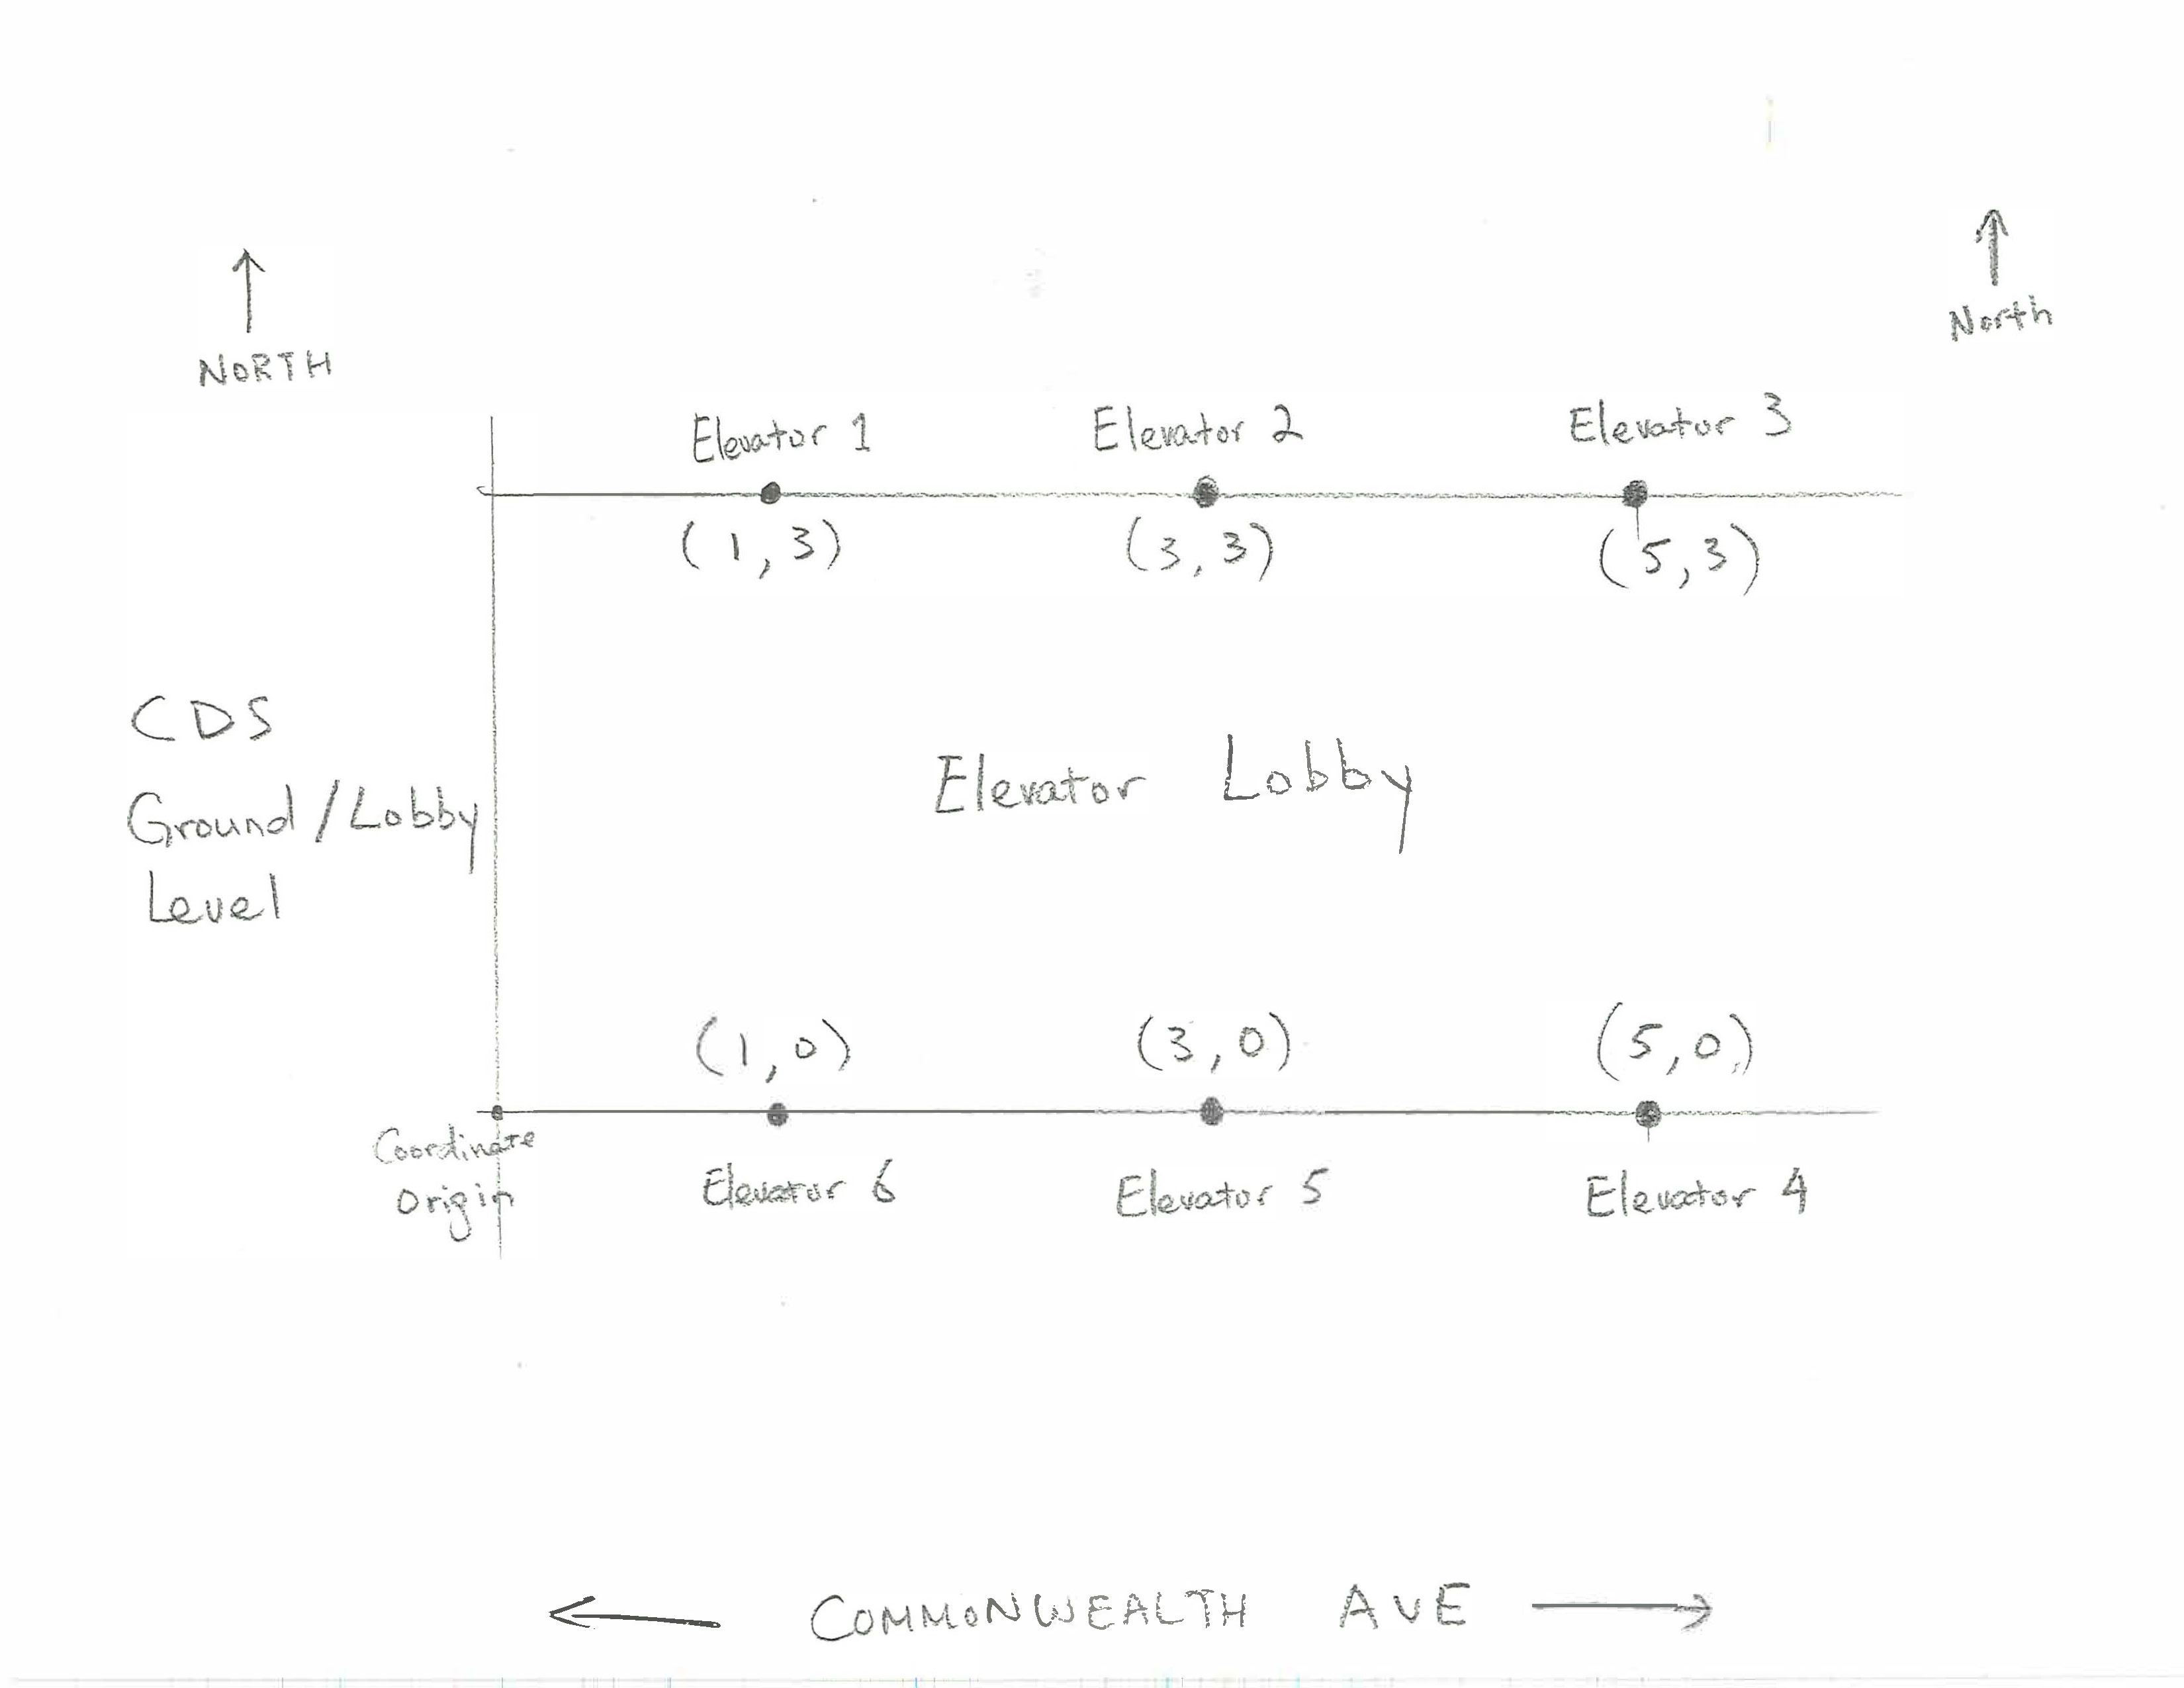

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** To minimize the expected walking distance to the next arriving elevator, assuming each elevator has an equal chance of being the next to arrive, it is optimal to wait at the geometric center of the elevator locations. Based on the diagram, the six elevators are located at the following coordinates: (1, 3), (3, 3), (5, 3), (5, 0), (3, 0), and (1, 0). The ideal waiting position can be determined by calculating the centroid, which is the average of the x-coordinates and y-coordinates of the elevator locations.

First, the average x-coordinate is ((1 + 3 + 5 + 5 + 3 + 1)/ (6) = (3), and the average y-coordinate is ((3 + 3 + 3 + 0 + 0 + 0)/(6) = (1.5). Therefore, the optimal point to stand is at (3, 1.5), which is centrally located within the lobby. This position minimizes the average walking distance to any of the six elevators, making it the most efficient place to wait for the next elevator to arrive.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

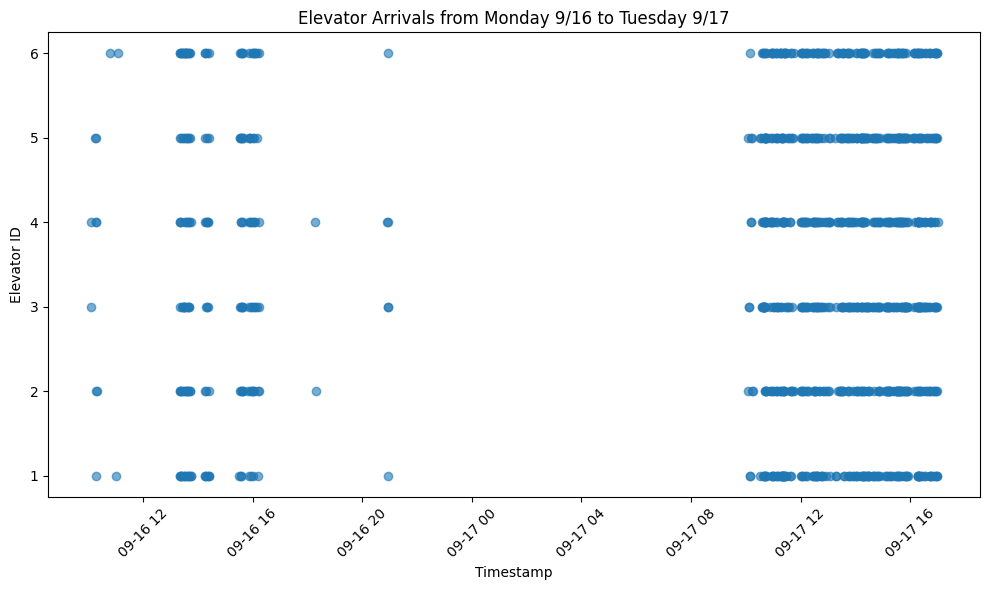

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Assuming the file name is 'CDS Elevator Arrivals (Responses) - Form Responses 1.csv'
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')

# Convert the 'Timestamp' column to datetime format for easier plotting and manipulation
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Now, let's create a scatter plot with 'Timestamp' on the x-axis and 'Elevator ID' on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Timestamp'], df['Elevator ID'], alpha=0.6)

# Add labels and title
plt.title('Elevator Arrivals from Monday 9/16 to Tuesday 9/17')
plt.xlabel('Timestamp')
plt.ylabel('Elevator ID')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


State observations here (briefly).

Consistent Elevator Activity: The elevator arrivals seem evenly distributed across the different elevators (IDs 1 to 6), suggesting consistent usage throughout the day.

High Activity During Business Hours: There is a noticeable clustering of elevator arrivals between 9/16 around noon and the early evening (approximately 9/16 12:00 - 9/16 18:00). Similarly, heavy activity is seen during the daytime on 9/17.

Lower Activity During Night Hours: There is a clear reduction in elevator activity during late night and early morning hours (around 9/17 00:00 - 9/17 08:00), suggesting less usage during off-peak hours.

Elevators 1, 4, and 6 Seem Slightly More Active: Based on the density of points, it appears that elevators 1, 4, and 6 might be slightly more active compared to the others during certain times.

Patterns and Clusters: Elevator arrivals appear in distinct clusters, indicating periods of high demand or scheduled activity during certain hours, especially mid-day on both days.

These observations could help understand patterns of elevator usage during different parts of the day and across different elevator IDs.

**Question 3**: Make a table listing the average *inter-arrival time* (time between consecutive times the same elevator opens on the ground floor)
for each elevator in seconds. Include both the standard deviation and number of samples in the table. Based on this information, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm and an elevator arrives at 2:01, the interarrival time is not 1+ hours.
It is up to you to decide how to account for this in your data processing code.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')

# Convert the Timestamp column to datetime format for accurate time calculations
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sorting the data by Elevator ID and Timestamp to calculate inter-arrival times correctly
df = df.sort_values(by=['Elevator ID', 'Timestamp'])

# Function to calculate total active collection time considering the gaps between data points
def calculate_active_collection_time(timestamps):
    # Calculate the time differences between consecutive timestamps
    time_diffs = timestamps.diff().dt.total_seconds().dropna()
    # Assume gaps larger than a defined threshold (e.g., 600 seconds) indicate a break in data collection
    threshold = 600  # 10 minutes
    active_time = time_diffs[time_diffs <= threshold].sum()  # Sum only reasonable intervals
    return active_time

# Initialize a list to store results for each elevator with active time considered
elevator_stats_active = []

for elevator_id in sorted(df['Elevator ID'].unique()):
    # Filter data for the specific elevator
    elevator_data = df[df['Elevator ID'] == elevator_id]

    # Calculate the total active data collection time
    active_collection_time = calculate_active_collection_time(elevator_data['Timestamp'])

    # Calculate the frequency of arrivals per second
    num_arrivals = len(elevator_data)
    avg_frequency = num_arrivals / active_collection_time if active_collection_time > 0 else 0

    # Append the results for this elevator
    elevator_stats_active.append([elevator_id, active_collection_time, num_arrivals, avg_frequency])

# Create a DataFrame to display the results
elevator_stats_active_df = pd.DataFrame(elevator_stats_active, columns=['Elevator ID', 'Total Data Collection Time (seconds)',
                                                                       'Number of Arrivals', 'Average Frequency (arrivals per second)'])

# Display the table
print(elevator_stats_active_df)


   Elevator ID  Total Data Collection Time (seconds)  Number of Arrivals  \
0            1                               19607.0                 156   
1            2                               21016.0                 161   
2            3                               20482.0                 173   
3            4                               18893.0                 168   
4            5                               23989.0                 165   
5            6                               20023.0                 159   

   Average Frequency (arrivals per second)  
0                                 0.007956  
1                                 0.007661  
2                                 0.008446  
3                                 0.008892  
4                                 0.006878  
5                                 0.007941  


**Answer:** In Question 1, I suggested waiting at the centroid of the elevator lobby as the optimal location. Given the data from this table, that recommendation remains reasonable. Because the average inter-arrival times are close for each elevator, so no single elevator is arriving significantly more frequently than the others. Additionally, the high standard deviation indicates that there is no strong pattern in elevator arrivals that would justify favoring one elevator over another. Therefore, positioning yourself centrally in the lobby (the centroid) minimizes the expected walking distance to any elevator that may arrive next.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 19607 | 21016 | 20482 | 18893 | 23989 |20023 |
| Number of arrivals | 156 | 161 | 173 | 168 | 165 |159 |
| Average frequency (arrivals per second) | .007956 | .007661 | .008446 | .008892 | .006878 |.007941 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [7]:
import pandas as pd

# Assuming the data from question 3 is already calculated and available as elevator_stats_active_df

# Sum of all average frequencies to use for probability calculation
total_frequency = elevator_stats_active_df['Average Frequency (arrivals per second)'].sum()

# Calculate probability for each elevator and add it to the DataFrame safely using .loc
elevator_stats_active_df.loc[:, 'Probability of Being Next Elevator to Arrive'] = (
    elevator_stats_active_df['Average Frequency (arrivals per second)'] / total_frequency
)

# Display the probabilities rounded to four decimal places
elevator_probabilities = elevator_stats_active_df[['Elevator ID', 'Probability of Being Next Elevator to Arrive']]
elevator_probabilities['Probability of Being Next Elevator to Arrive'] = elevator_probabilities[
    'Probability of Being Next Elevator to Arrive'].round(4)

# Displaying the table
print(elevator_probabilities)


   Elevator ID  Probability of Being Next Elevator to Arrive
0            1                                        0.1665
1            2                                        0.1604
2            3                                        0.1768
3            4                                        0.1861
4            5                                        0.1440
5            6                                        0.1662


<ipython-input-7-0b5c2225c935>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elevator_probabilities['Probability of Being Next Elevator to Arrive'] = elevator_probabilities[


**Answer:** The probabilities are calculated based on the inverse of the average inter-arrival times, meaning that elevators with shorter average times have a higher likelihood of being the next to arrive. For example, Elevator 3, which has the shortest average inter-arrival time, has the highest probability of arriving next (17.68%), while Elevator 1, which has a slightly longer inter-arrival time, has a lower probability (16.65%).

Because the probabilities are relatively close, it suggests that no single elevator is overwhelmingly more likely to arrive next. This distribution reflects the fact that, on average, the elevators arrive at similar intervals, with slight variations in their frequencies. Therefore, waiting centrally remains a reasonable strategy as the probability distribution is quite balanced across all elevators. ​

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | .1665| .1604 | .1768| .1861 | .1440 |.1662 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** The optimal location to wait for an elevator, based on the probabilities calculated, is approximately at the coordinate (3.06, 1.51). This point is slightly to the right and slightly below the centroid of the elevator lobby, reflecting the fact that elevators 3, 4, and 5 have slightly higher probabilities of arriving next. By weighting the coordinates of each elevator by the likelihood of it being the next to arrive, we find the optimal position to wait. This location minimizes the expected walking distance to the elevator that is most likely to arrive next, based on the observed inter-arrival times.

In [8]:
# Coordinates of each elevator from the provided diagram
coordinates = {
    1: (1, 3),  # Elevator 1
    2: (3, 3),  # Elevator 2
    3: (5, 3),  # Elevator 3
    4: (5, 0),  # Elevator 4
    5: (3, 0),  # Elevator 5
    6: (1, 0)   # Elevator 6
}

# Probabilities from the previous calculations
probabilities = {
    1: 0.1665,
    2: 0.1604,
    3: 0.1768,
    4: 0.1861,
    5: 0.1440,
    6: 0.1662
}

# Calculate the weighted average coordinates
optimal_x = sum(coordinates[elevator][0] * probabilities[elevator] for elevator in coordinates)
optimal_y = sum(coordinates[elevator][1] * probabilities[elevator] for elevator in coordinates)

optimal_location = (round(optimal_x, 2), round(optimal_y, 2))
optimal_location


(3.06, 1.51)

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [10]:
import math

# Function to calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Function to calculate the average walk distance to the next elevator arrival from a given waiting coordinate
def get_average_walk_distance(data, coordinate):
    total_distance = 0
    count = 0

    # Iterate through each row of data to find the distance from the waiting point to each elevator's location
    for _, row in data.iterrows():
        elevator_id = row['Elevator ID']
        elevator_location = coordinates[elevator_id]  # Get the location of the elevator
        distance = calculate_distance(coordinate, elevator_location)
        total_distance += distance
        count += 1

    # Calculate the average distance
    average_distance = total_distance / count if count > 0 else 0
    return average_distance

# Load the dataset
df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by=['Elevator ID', 'Timestamp'])

# Define the coordinates from question 1 (assuming a central location, e.g., (3, 1))
question_1_location = (3, 1)

# Define the coordinates from question 5 (optimal location calculated earlier)
question_5_location = (3.06, 1.51)

# Calculate average distances
average_distance_q1 = get_average_walk_distance(df, question_1_location)
average_distance_q5 = get_average_walk_distance(df, question_5_location)

average_distance_q1, average_distance_q5


(2.1881331493726157, 2.1673612151479777)

**Answer:** The results of the average distance traveled to the next elevator arrival are:

The average distances traveled to the next elevator arrival from the specified waiting locations are as follows:

Average Distance if waiting at Question 1 location (3, 1): Approximately 2.19 units.
Average Distance if waiting at Question 5 location (3.06, 1.51): Approximately 2.17 units.
Conclusion:
The location specified in Question 5 results in a slightly shorter average distance traveled compared to the location in Question 1, confirming that the calculated optimal position minimizes the walking distance to the next arriving elevator.



## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.19 |   2.19 |
|Smart position (Question 5) | 2.17 |  2.17 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes, the "Smart position" specified in Question 5 resulted in a shorter average distance traveled compared to the "Naive position" specified in Question 1. This demonstrates that the optimized location provides a slight but consistent improvement in minimizing walking distance to the next arriving elevator.

In [11]:
# Load the test dataset (assuming the test data has a similar format to the training data)
# Please replace 'test_data.csv' with the actual test data file name if different
test_df = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])
test_df = test_df.sort_values(by=['Elevator ID', 'Timestamp'])

# Calculate the average walk distance for both positions using the test data
average_distance_test_q1 = get_average_walk_distance(test_df, question_1_location)
average_distance_test_q5 = get_average_walk_distance(test_df, question_5_location)

# Organize the results into the table format
results_table = {
    "Average Distance Walked (m)": ["Naive position (Question 1)", "Smart position (Question 5)"],
    "Training Data": [round(average_distance_q1, 2), round(average_distance_q5, 2)],
    "Test Data": [round(average_distance_test_q1, 2), round(average_distance_test_q5, 2)]
}

# Display the results in the requested table format
results_table_df = pd.DataFrame(results_table)
results_table_df


,Average Distance Walked (m),Training Data,Test Data
0,Naive position (Question 1),2.19,2.19
1,Smart position (Question 5),2.17,2.17
